<div style="border:solid green 2px; padding: 20px">

<b>Привет, Алексей!</b>

Меня зовут Ярослав П. и мы с тобой уже знакомы. Рад поработать вместе снова!

Предлагаю общаться на «**ты**». Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на «**вы**».

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания или советы.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    
    
### <span style="color:orange">Обратная связь</span><a class="tocSkip">

- Проект отлично выполнен.
- Ответ на вопрос верный! Однако прошу немного более подробно расписать математическое обоснование.
- Также оставил комментарий про метрику R2.
    
### <span style="color:orange">Обратная связь (v2)</span><a class="tocSkip">

- Проект отлично доработан, спасибо за уделенное время!
    
Проект принят, успехов в дальнейшем обучении!

<div class="alert alert-info"> <b>Комментарий студента:</b> Привет, Ярослав. Взаимно, конечно, можно на ты. Ниже прикладываю дополнения</div>

<div class="alert alert-info"> <b>Изменения и дополнения: 
    1)Исправил r2score         2)Расписал $формулу    $  
    </b> .</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

Все здорово 😊

</div>


Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

__Инструкция по выполнению проекта__    

1.Загрузите и изучите данные.    
2.Ответьте на вопрос и обоснуйте решение.     
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)    
a. Изменится. Приведите примеры матриц.     
b. Не изменится.
Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.     
3.Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.    4.Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не      отличается до и после преобразования. Примените метрику R2.    

__Описание данных__

Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.   
Целевой признак: количество страховых выплат клиенту за последние 5 лет.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Введение хорошее, разве что можно добавить название проекта.

</div>


## 1. Загрузка данных

In [1]:
# Подключим все необходимые библиотеки 
import pandas as pd
from sklearn.datasets import make_spd_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from numpy.linalg import inv, cond
import numpy as np

In [2]:
#Загрузим наш датасет
insurance_data = pd.read_csv('/datasets/insurance.csv')

In [3]:
#Посмотрим наши данные
#Изучим наш датасет
display(insurance_data.head())
display(insurance_data.tail())
display(insurance_data.info())
display(insurance_data.describe())

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0
4999,1,28.0,40600.0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000



Предоставленные данные состоят из 5 столбцов. 4 из них - признаки, а один - Страховые выплаты - целевой признак. Пропущенных значений нет.

In [4]:
#приведем возраст и зарплату к int типу данных
insurance_data['Возраст'] = insurance_data['Возраст'].astype(int)
insurance_data['Зарплата'] = insurance_data['Зарплата'].astype(int)
insurance_data.dtypes

Пол                  int64
Возраст              int64
Зарплата             int64
Члены семьи          int64
Страховые выплаты    int64
dtype: object

In [5]:
#Проверим на дубли
insurance_data.duplicated().value_counts()

False    4847
True      153
dtype: int64

Дубликаты есть. Так как совпадение по всем признакам крайне маловероятно, избавимся от них.

In [6]:
insurance_data.drop_duplicates(inplace=True)

In [7]:
#Проверим успешность операции
insurance_data.duplicated().value_counts()

False    4847
dtype: int64

In [8]:
#Переименуем столбцы датасета для удобства.
insurance_data.columns = ['sex', 'age', 'salary', 'family_members', 'insurance_payments']

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Данные загружены, немного проанализированы - отлично. Это важно делать даже в таком небольшом проекте.

</div>

## 2. Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

__Вопрос:__ Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?


Докажем, что:

$$
a = Xw = X'w' = XPw' = a'
$$

Чтобы это равенство выполнялось, необходимо соблюсти условие:

$$
w' = P^{-1} w
$$


Получим следующее равенство:

$$
a = Xw = X'(P^{-1} w) = XP(P^{-1} w) = XEw = Xw = a
$$


__Ответ:__ Нет, не изменится.

__Обоснование:__ Как известно, обратная для квадратной матрицы P — матрица P с верхним индексом -1, произведение которой на P равно единичной матрице. Если любую матрицу умножить на единичную (или наоборот), получится эта же матрица. Поэтому качество линейной регрессии не изменится - матрицы будут одинаковы.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

В целом все верно.

</div>


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера</b>

Только не совсем понял, как мы получили это выражение. 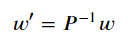 Распиши, пожалуйста, подробнее.

</div>


 <div class="alert alert-info"> <b>Комментарий студента:</b> Расписал</div>


Формула расчета весов для линейной регрессии:

$$
w = (X^T X)^{-1} X^T y
$$
Представим новую матрицу признаков $X1$ как произведение старой $X$ на матрицу $P$ (обратимую):

$$
X1 = X * P
$$
Подставим новое значение X1 в формулу $w1$:

$$
w1 = ((X P)^T X P)^{-1} (X P)^T y
$$
Раскроем первое произведение $ (XP)^T $:

$$
w1 = (P^T X^T X P)^{-1} P^T X^T y
$$
Перегруппируем множители в скобках, чтобы это выглядело как произведение трех множителей:

$$
w1 = (P^T (X^T X) P)^{-1} P^T X^T y
$$
Раскроем скобки $ (P^T (X^T X) P)^{-1} $:

$$
w1 = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$
Так как $P$ по условию обратимая, то произведение $(P^T)^{-1} P^T$ равно $E$ (единичная матрица):

$$
w1 = P^{-1} (X^T X)^{-1} E X^T y = P^{-1} (X^T X)^{-1} X^T y
$$
Можно заметить, что справа получилась формула для $w$:

$$
w1 = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w
$$

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

Все здорово, вывод формулы верный, спасибо, что подробно расписал!

</div>


## 3. Алгоритм преобразования

**Алгоритм**


Создадим случайную обратимую матрицу P, затем умножим матрицу с признаками X на матрицу P.

$$
X@P=Z
$$

Для возврата к исходной матрице X, умножим новую матрицу Z на обратную матрицу P^-1.

$$
Z@P^{-1}=X
$$

**Обоснование**


Как было доказано в шаге 2, качество линейной регрессии не изменится при умножении матрицы признаков на любую обратимую матрицу P. Поэтому можно следовать описанному выше алгоритму без опасения получить другой результат линейной регрессии.

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера</b>

Здесь преполагается записать алгоритм в таком виде:

1. Создадим...
2. Проверим...
3. Умножим... и т.д.

</div>

## 4. Проверка алгоритма


Выделим из датасета набор признаков и целевой признак.

In [9]:
insurance_features = insurance_data.drop('insurance_payments', axis=1)

In [10]:
insurance_target = insurance_data['insurance_payments']

Получим матрицу из значений набора признаков.

In [11]:
insurance_features_matrix = insurance_features.values

In [12]:
insurance_features_matrix

array([[    1,    41, 49600,     1],
       [    0,    46, 38000,     1],
       [    0,    29, 21000,     0],
       ...,
       [    0,    20, 33900,     2],
       [    1,    22, 32700,     3],
       [    1,    28, 40600,     1]])

Создадим рандомную матрицу нужного размера с помощью инструмента make_spd_matrix библиотеки sklearn.

In [13]:
random_matrix = make_spd_matrix(n_dim=4, random_state=12345)
display(random_matrix)

array([[ 1.37245706, -1.03845957, -0.84389737, -0.26033015],
       [-1.03845957,  2.87886199,  1.67157893,  0.48470484],
       [-0.84389737,  1.67157893,  2.10204907,  0.3257384 ],
       [-0.26033015,  0.48470484,  0.3257384 ,  1.01695329]])


Проверим матрицу на обратимость - вероятность сгенерировать необратимую матрицу очень мала, но все же. При использовании необратимой матрицы  алгоритм работать не будет. Для проверки будем использовать функцию __numpy.linalg.inv()__, если матрица необратима, то код упадет с ошибкой.

In [14]:
inv(random_matrix)

array([[ 1.06341364,  0.23949912,  0.22304514,  0.08662924],
       [ 0.23949912,  0.72198481, -0.45683306, -0.13647886],
       [ 0.22304514, -0.45683306,  0.93223396, -0.0237669 ],
       [ 0.08662924, -0.13647886, -0.0237669 ,  1.07816747]])

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Отлично, проверка на обратимость есть! Было здорово реализовать ее генерацию и проверку на обратимость с помощью функции или цикла (то есть если вдруг сгенерировалась необратимая матрица, то генерируем другую автоматически).

</div>


Матрица обратима

Перемножим матрицы.

In [15]:
transformed_matrix = insurance_features_matrix @ random_matrix
features_transformed = list(transformed_matrix)

Разделим набор признаков и целевой признак исходного датасета на обучающую и тестовую выборки.

In [16]:
features_train_origin, features_test_origin = train_test_split(insurance_features, test_size=0.25, random_state=12345)

In [17]:
target_train_origin, target_test_origin = train_test_split(insurance_target, test_size=0.25, random_state=12345)

Создадим модели.

In [18]:
model1 = LinearRegression()
model2 = LinearRegression()

Обучим первую модель, сделаем предсказание и оценим качество модели.

In [19]:
model1.fit(features_train_origin, target_train_origin)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
predicted_origin = model1.predict(features_test_origin)

In [21]:
print("R2 исходного набора данных:", r2_score(target_test_origin,predicted_origin))

R2 исходного набора данных: 0.4230772761583642


<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера</b>

Обрати внимание, что в r2_score сначала нужно передавать ответы, а потом предсказания.

</div>


 <div class="alert alert-info"> <b>Комментарий студента:</b> Исправил, результат заметно лучше</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера (v2)</b>

👍

</div>


Разделим набор признаков преобразованного датасета на обучающую и тестовую выборки. Обучим вторую модель, сделаем предсказание и оценим качество модели.

In [22]:
features_train_transformed, features_test_transformed = train_test_split(features_transformed, test_size=0.25, random_state=12345)

In [23]:
model2.fit(features_train_transformed, target_train_origin)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
predicted_transformed = model2.predict(features_test_transformed)

In [28]:
print("R2 преобразованного набора данных:", r2_score(target_test_origin,predicted_transformed))

R2 преобразованного набора данных: 0.42307727615868795


Показатели R2 низкие, но отличаются незначительно.

Попробуем восстановить исходную матрицу, используя формулу из шага 3.

$$
Z@P^{-1}=X
$$

In [26]:
final_matrix = transformed_matrix.dot(inv(random_matrix))

In [27]:
#сравним округленные матрицы
np.round(final_matrix) == np.round(insurance_features_matrix)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       ...,
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

Матрицы одинаковы. Мы реализовали алгоритм, описанный в шаге 3 и доказали, что качество линейной регрессии не меняется при умножении матрицы признаков на любую обратимую матрицу P.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера</b>

Отличный результат.

</div>


## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования